In [108]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from common import Images, Fonts, Colors, add_twitter_handle
from matplotlib.patches import Rectangle, Ellipse, Arc
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [142]:
file = "4-23-RGN-goal5"
title = "OL Reign v Chicago Red Stars (4/23/2023)"
subtitle = "Jess Fishlock scored OL Reign's final goal of the match for a final score of 5-2."

In [135]:
df = pd.read_csv(file + ".csv")
df

,minute,second,type,x,y,x2,y2,name,number,team
0,75,23,1,2.2,44.2,15.0,7.7,P. Tullis-Joyce,91,RGN
1,75,26,1,15.1,7.7,27.5,25.4,S. Huerta,11,RGN
2,75,29,1,27.6,25.3,27.9,13.3,E. Sonnett,2,RGN
3,75,39,1,68.6,29.3,87.8,20.0,S. Huerta,11,RGN
4,75,40,1,87.8,20.0,87.1,52.1,B. Balcer,8,RGN
5,75,42,16,87.1,52.1,99.0,51.0,J. Fishlock,10,RGN


In [136]:
field = Colors.WHITE
lines = Colors.BLACK

In [149]:
def move_point_towards(x, y, x2, y2, r):
    """Moves x,y towards x2, y2 with a distance of r."""
    d = math.sqrt((x - x2) ** 2 + (y - y2) ** 2)
    theta = math.atan(-(y2 - y) / (x2 - x))
    x_sign = 1 if x < x2 else -1
    y_sign = 1 if (y < y2 and x > x2) or (y > y2 and x > x2) else -1
    return (x + x_sign * math.cos(theta) * r, y + y_sign * math.sin(theta) * r)


def player_mark(ax, x, y, label):
    ax.plot(
        x,
        y,
        marker="o",
        markerfacecolor=field,
        markeredgecolor=lines,
        markersize=20,
        markeredgewidth=3,
    )
    ax.text(
        x,
        y,
        label,
        ha="center",
        va="center",
        color=Colors.BLACK,
        fontsize=14,
    )
    
def arrow_path(ax, start, end, style):
    ax.add_patch(
        patches.FancyArrowPatch(
            start,
            end,
            arrowstyle="-",
            mutation_scale=40,
            linewidth=3,
            linestyle="--",
            color=lines,
        )
    )
    ax.add_patch(
        patches.FancyArrowPatch(
            move_point_towards(end[0], end[1], start[0], start[1], 0.5),
            move_point_towards(end[0], end[1], start[0], start[1], -1),
            arrowstyle="->",
            mutation_scale=40,
            linewidth=3,
            linestyle="-",
            color=lines,
        )
    )

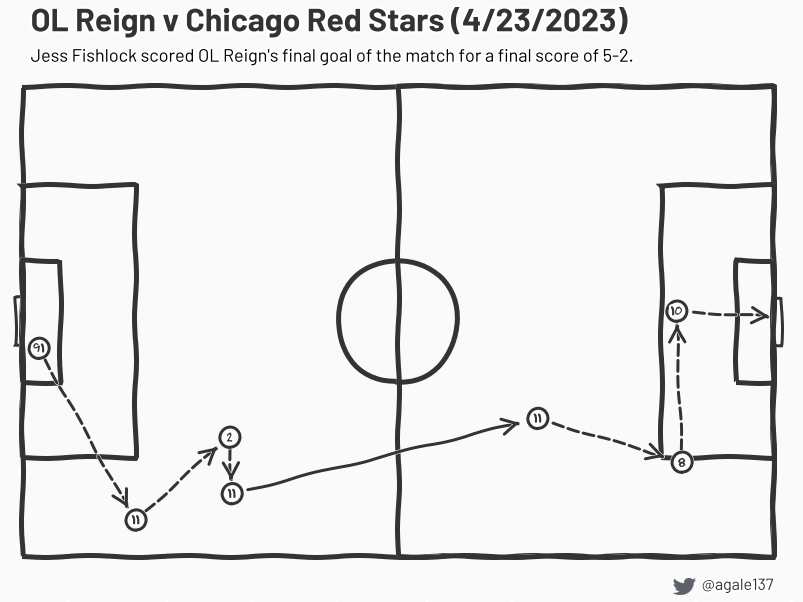

In [153]:
# Setup
plt.rcParams["figure.figsize"] = (14, 9)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)
plt.xkcd()

# Build the field
# Goal
ax.add_patch(Rectangle((100, 45), 1, 10, ec=lines, fill=False, lw=3))
ax.add_patch(Rectangle((0, 45), -1, 10, ec=lines, fill=False, lw=3))
# Touchline
ax.add_patch(Rectangle((0, 0), 100, 100, ec=lines, fc=field, lw=5))
# Center circle
ax.add_patch(Ellipse((50, 50), 16, 26, ec=lines, fill=False, lw=5))
# Center line
ax.add_patch(Rectangle((50, 0), 50, 100, ec=lines, fill=False, lw=5))
# 18-yard box
ax.add_patch(Rectangle((100 - 15, 21), 15, 58, ec=lines, fill=False, lw=5))
ax.add_patch(Rectangle((0, 21), 15, 58, ec=lines, fill=False, lw=5))
# 6-yard box
ax.add_patch(Rectangle((100 - 5, 37), 5, 26, ec=lines, fill=False, lw=5))
ax.add_patch(Rectangle((0, 37), 5, 26, ec=lines, fill=False, lw=5))

x_prev = None
y_prev = None
for i, row in df.iterrows():
    player_mark(ax, row["x"], row["y"], row["number"])

    # Shift line start and end to account for player marks
    start = move_point_towards(row["x"], row["y"], row["x2"], row["y2"], 2)
    # For goals, don't shift in the end of the line.
    end = (
        move_point_towards(row["x2"], row["y2"], row["x"], row["y"], 3)
        if row["type"] == 1
        else (row["x2"], row["y2"])
    )
    arrow_path(ax, start, end)

    # When there is a longer distance between the previous pass and the next,
    # this means the player was dribbling
    if x_prev and y_prev:
        if math.sqrt((x_prev - row["x"]) ** 2 + (y_prev - row["y"]) ** 2) > 5:
            player_mark(ax, x_prev, y_prev, row["number"])
            arrow_path(ax, move_point_towards(x_prev, y_prev, row["x"], row["y"], 2), move_point_towards(row["x"], row["y"], x_prev, y_prev, 2))
            ax.add_patch(
                patches.FancyArrowPatch(
                    ,
                    ,
                    arrowstyle="->",
                    mutation_scale=40,
                    linewidth=3,
                    linestyle="-",
                    color=lines,
                )
            )

    x_prev = row["x2"]
    y_prev = row["y2"]

# Axes
plt.ylim([-2, 102])
plt.xlim([-2, 102])
ax.axis("off")

# Title
plt.title(
    title,
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    x=0.03,
    y=1.08,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
ax.text(
    0.03,
    1.03,
    subtitle,
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=ax.transAxes,
)

add_twitter_handle(fig, x=0.78, y=0.08, fs=16, w=0.028)

# Save image
plt.savefig("images/" + file + ".png", bbox_inches="tight", pad_inches=0.5, dpi=400)